In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [2]:
data = pd.read_csv('Jamboree_Admission.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Problem Statement**


Problem Statement is to find the chances a student will get into the Ivy league colleges based on the score of different tests and different variables

Dropping serial no. column from the dataset, as that is just the unique key and doesn't affect our actual results at all.

In [6]:
data.drop(['Serial No.'], axis = 1, inplace = True)

In [7]:
data.shape

(500, 8)

Percentage of NULL values in every column

In [8]:
for c in data.columns:
    print(c, data[c].isnull().sum()*100/len(data[c]))

GRE Score 0.0
TOEFL Score 0.0
University Rating 0.0
SOP 0.0
LOR  0.0
CGPA 0.0
Research 0.0
Chance of Admit  0.0


In [9]:
data.duplicated().sum()

0

As we can see there is not duplicated data.

**UNIVARIATE ANALYSIS**

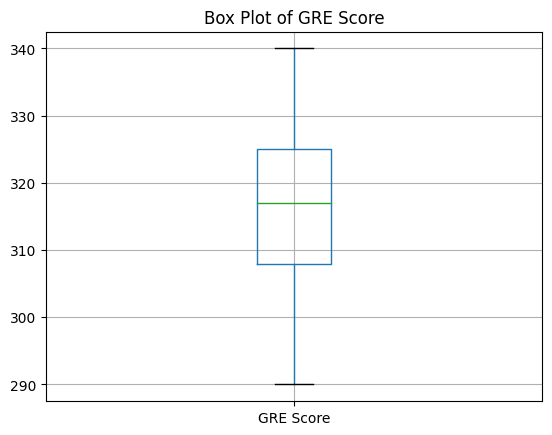

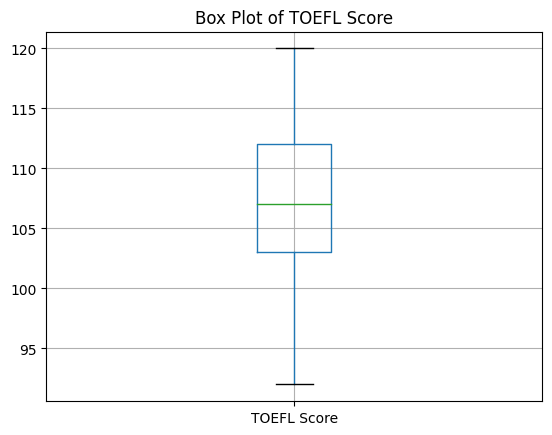

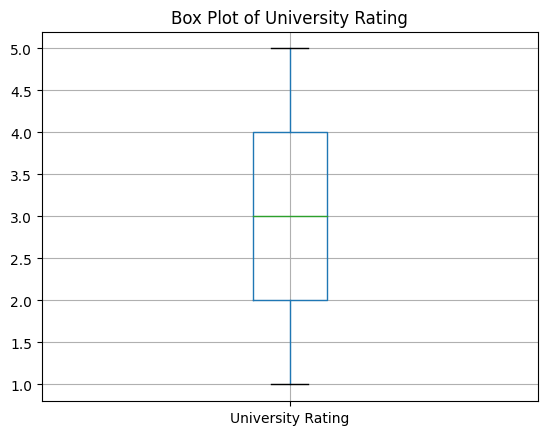

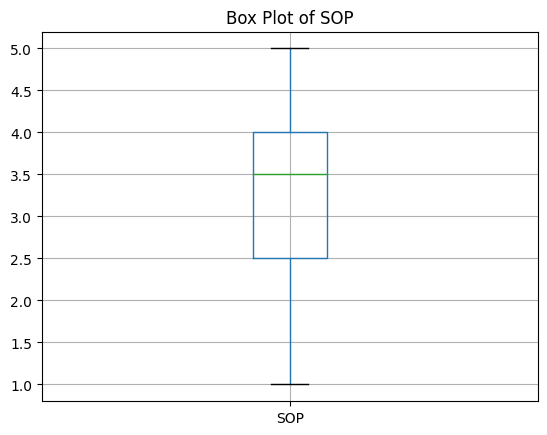

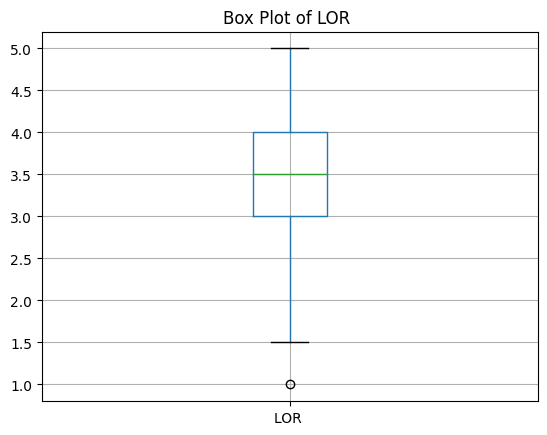

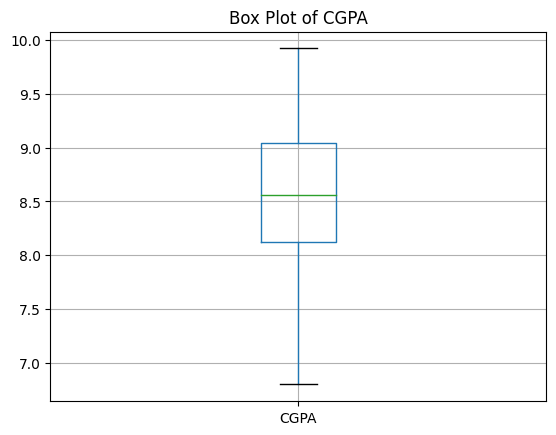

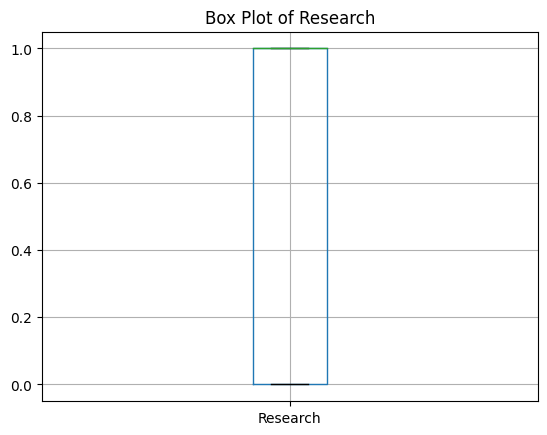

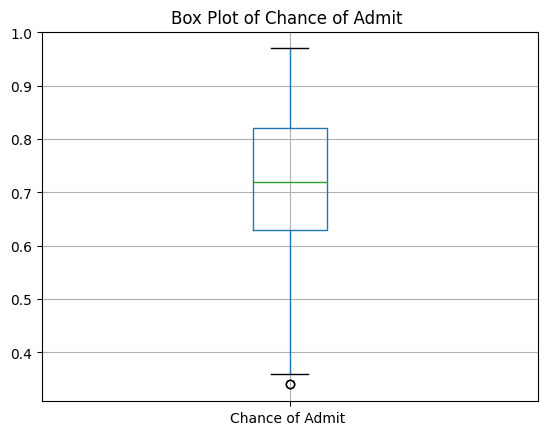

In [10]:
for column in data.columns:
    plt.figure()
    data.boxplot([column])
    plt.title(f"Box Plot of {column}")
    plt.show()


These are the box plots of all columns and these show that there are no noteworthy outliers in the data.

In [11]:
for column in data.columns:
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

print("Shape after removing outliers:", data.shape)


Shape after removing outliers: (497, 8)


Removed the outliers from the data so the data performs well, used IQR for remmoving the outliers based on the lower bound of IQR and upper bound of IQR.

**BIVARIATE ANALYSIS**

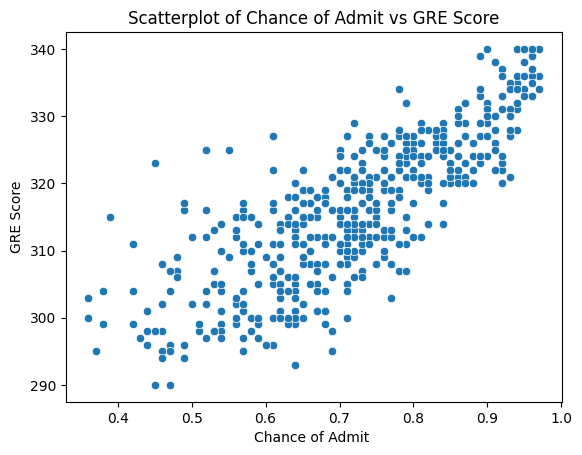

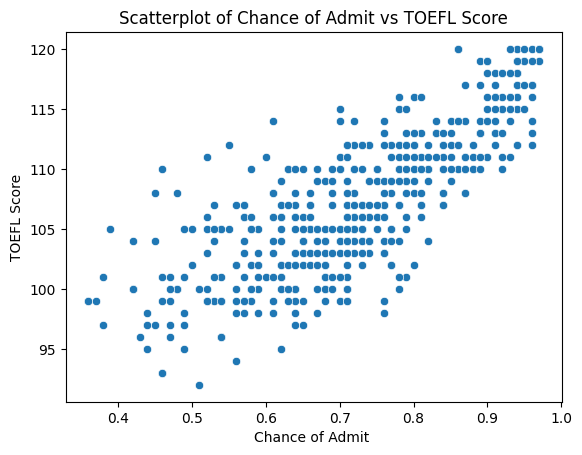

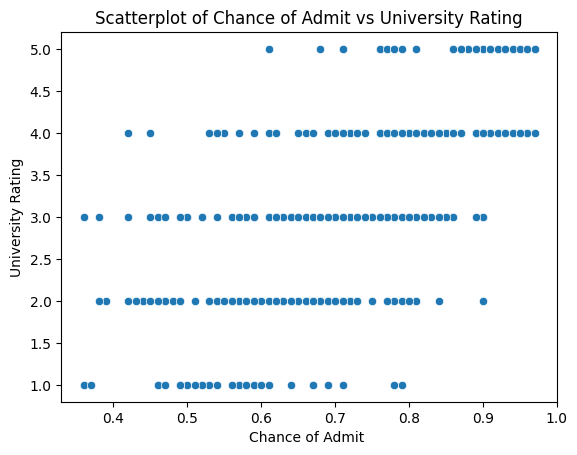

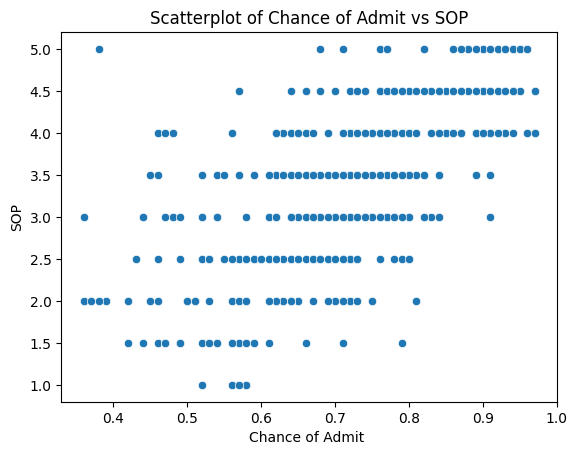

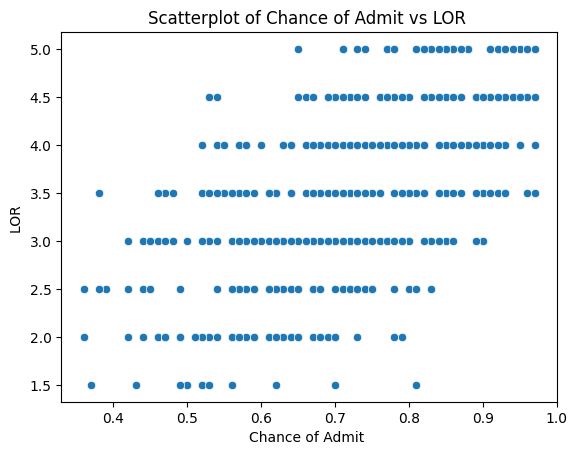

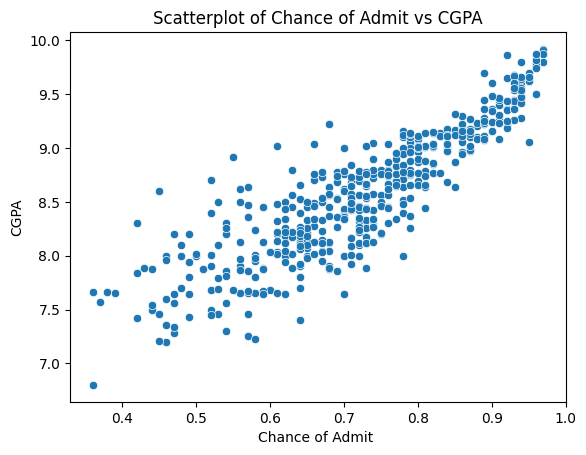

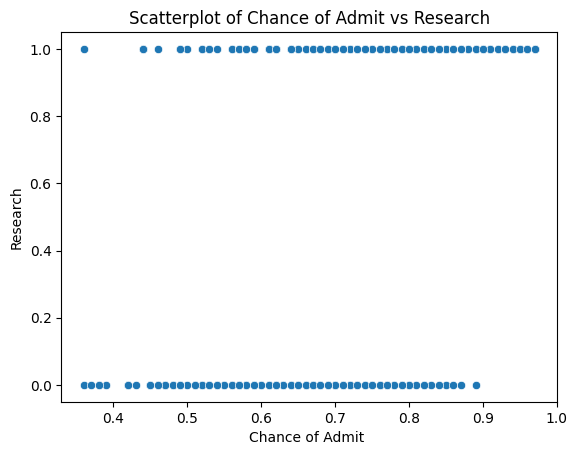

In [12]:
for column in data.columns:
  if column != 'Chance of Admit ':
    plt.figure()
    sns.scatterplot(data=data, x='Chance of Admit ', y=column)
    plt.title(f"Scatterplot of Chance of Admit vs {column}")
    plt.show()


From the above plots, multiple relations can be made such as GRE score, TOEFL score and CGPA directly affect the Chance of Admission, the more these scores and the more would be the chances of admission.

Research also shows a peculiar relation as those who did research are more likely to get accepted.

Let us do encoding here, and put all chances >= 0.5 as 1 and put all chances <0.5 as 0 (only for visual analysis).

In [13]:
df = data.copy()
df['Chance of Admit '] = df['Chance of Admit '].apply(lambda x: 1 if x>=0.5 else 0)

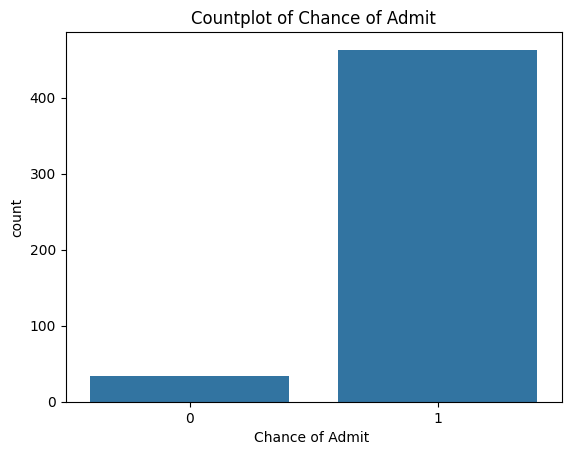

In [14]:
plt.figure()
sns.countplot(data=df, x='Chance of Admit ')
plt.title(f"Countplot of Chance of Admit")
plt.show()

It can be seen that less than 50 students only got less than 50% chances of being accepted.

0.5 can be a little less chances of admission instead let's take it as 0.7.

In [15]:
df = data.copy()
df['Chance of Admit '] = df['Chance of Admit '].apply(lambda x: 1 if x>=0.7 else 0)

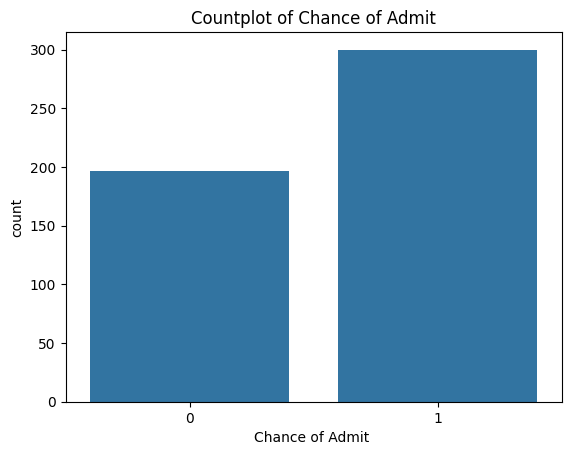

In [16]:
plt.figure()
sns.countplot(data=df, x='Chance of Admit ')
plt.title(f"Countplot of Chance of Admit")
plt.show()

Now, it can be seen that almost 200 people got less than 70% chances of admission.

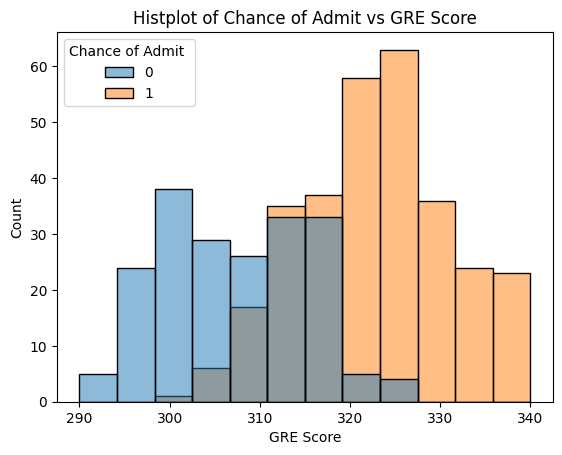

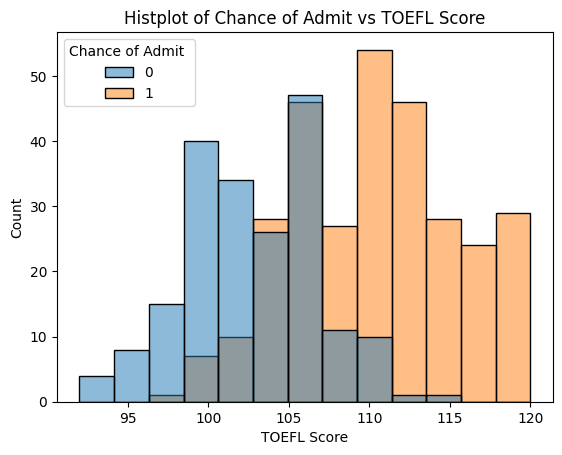

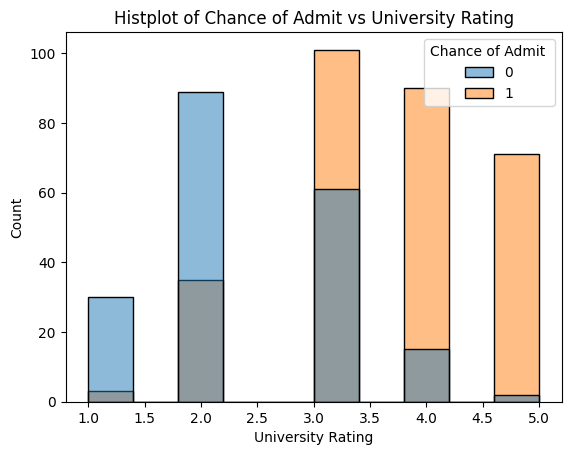

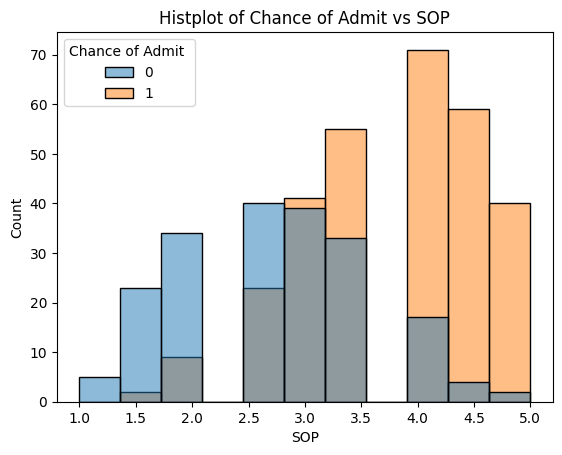

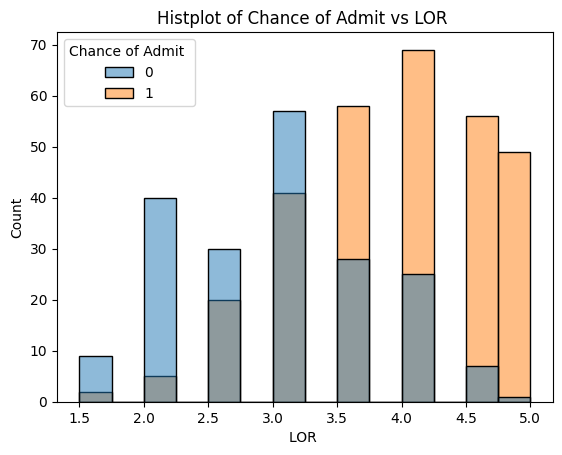

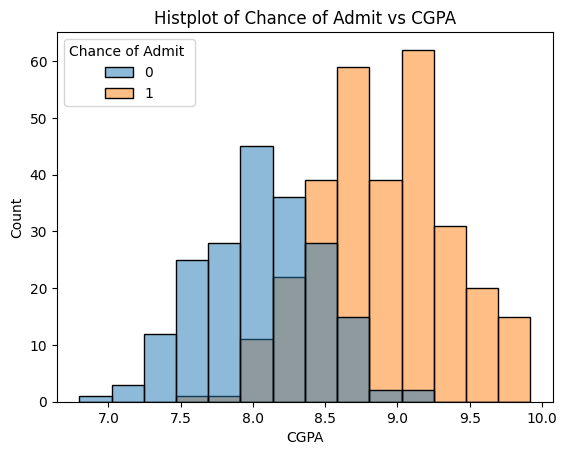

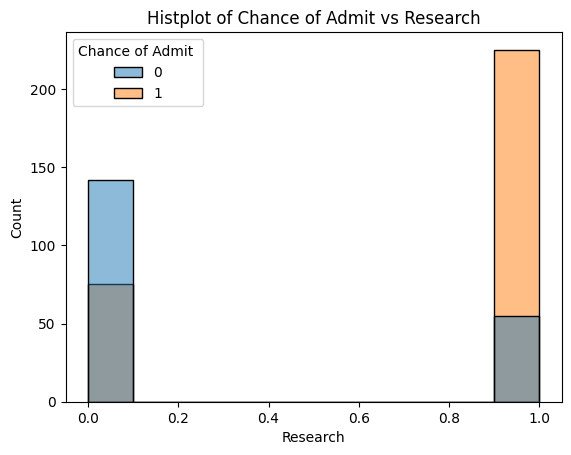

In [17]:
for column in data.columns:
  if column != 'Chance of Admit ':
    plt.figure()
    sns.histplot(data=df, hue='Chance of Admit ', x=column)
    plt.title(f"Histplot of Chance of Admit vs {column}")
    plt.show()


It is now more clear from the above histplots that the more score you have in tests and the more ratings you have the more are your chances of admission.

From above histplots it is clear that all of the attributes are positively correlated with chance of admission.

Finding correlation of data and then plotting the heatmap.

In [18]:
corr = data.corr()

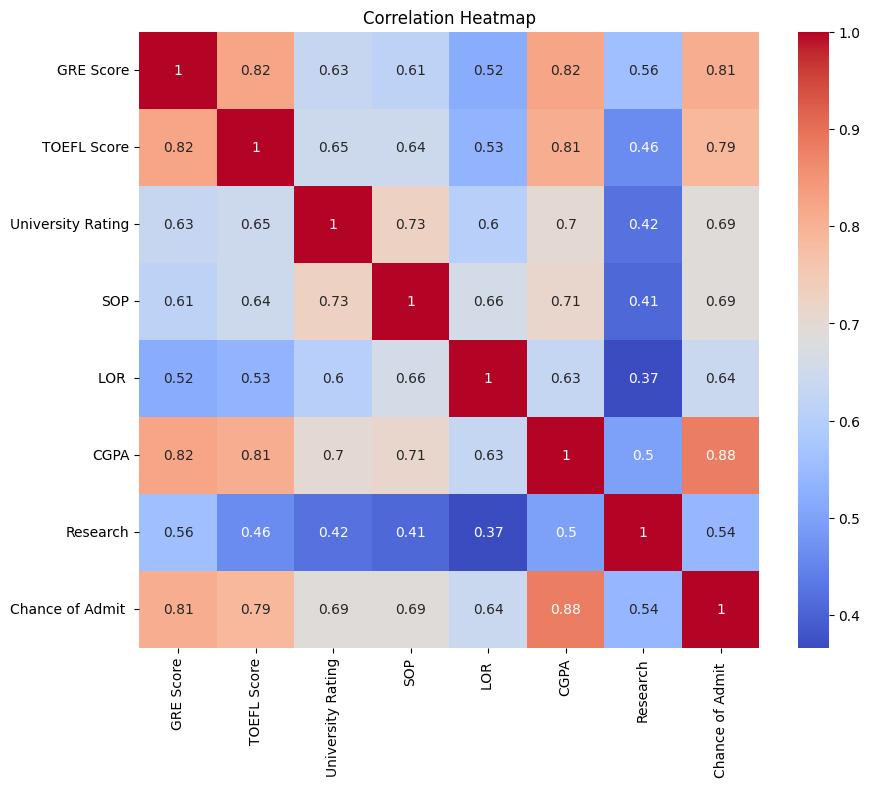

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The above assumption from the histplots can be confirmed from this heatmap, most of the attributes are positively correlated with chances of admission.

But here is also another problem, we can see that some attributes are correlated with one another as well, such as GRE score, TOEFL score and CGPA are all positively correlated with one another.

Doing Train-Test split of data along with validation data set

In [20]:
X = data.drop(['Chance of Admit '], axis=1)
y = data['Chance of Admit ']

In [21]:
X_v, X_test, y_v, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_v, y_v, test_size=0.25, random_state=101)

In [23]:
X_train.shape, X_val.shape, X_test.shape

((297, 7), (100, 7), (100, 7))

Normalising the data

In [24]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Making the Linear regression model for the data

In [25]:
X_sm = sm.add_constant(X_train_scaled)
lr_model = sm.OLS(y_train, X_sm).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     182.1
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          5.12e-102
Time:                        14:45:21   Log-Likelihood:                 411.96
No. Observations:                 297   AIC:                            -807.9
Df Residuals:                     289   BIC:                            -778.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7303      0.004    205.392      0.0

As it can be seen from the above summary of Linear regression model, the R-squares if 0.815 and it's better if its close to 1.

All the coefficients are also visible in the summary.

Finding score of linear regression model

In [26]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
score = model.score(X_val_scaled, y_val)
print(f'Score: {score}')

Score: 0.8444651383481533


The score for LR model is 84.4%

Trying out Ridge and Lasso Linear regression models on the same data.

In [27]:
ridge = Ridge(alpha=10)
ridge_model = make_pipeline(scaler, ridge)
ridge_model.fit(X_train_scaled, y_train)
score = ridge_model.score(X_val_scaled, y_val)
print(f'Score: {score}')

Score: 0.8472289497341955


This performance is coming the best after adjusting several alpha for the Ridge regularisation, i.e. 84.7%.

In [28]:
lasso = Lasso(alpha=0.01)
lasso_model = make_pipeline(scaler, lasso)
lasso_model.fit(X_train_scaled, y_train)
score = lasso_model.score(X_val_scaled, y_val)
print(f'Score: {score}')

Score: 0.8398794460319017


Surprisingly the score of 83.9% is the best that is possible after trying out multiple alhpa for the Lasso regularisation.

The possible reason for this performance could be that there is multicollinearity between the variables as we saw earlier through the heatmap.

We will have to perform check for the same to be sure and remove them from the data.

The below function is the function to remove multicollinearity, it will take the Dataframe X and the threshold, then calculate VIF score and till VIF score of any variable is greater than the threshold it will remove the attribue

In [29]:
def remove_multicollinearity(X, threshold):
  dropped = 0
  dropped_variables = []
  while True:
    vif = pd.DataFrame()
    X_t = pd.DataFrame(X, columns=X_train.columns)
    vif['Features'] = X_t.columns
    vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    if vif['VIF'][0] > threshold:
      dropped_variables.append(vif['Features'][0])
    else:
      break

  return dropped_variables

In [30]:
to_drop = remove_multicollinearity(X_train_scaled, 5)
print(to_drop)
if(len(to_drop) > 0):
  X_train = X_train.drop(to_drop, axis=1)
  X_val = X_val.drop(to_drop, axis=1)
  X_test = X_test.drop(to_drop, axis=1)

[]


As all the variables here have VIF <= 5, therefore no variables were dropped.

**For Linear Regression, checking the assumptions of Linear Regression**

Text(0.5, 1.0, 'Histogram of residuals')

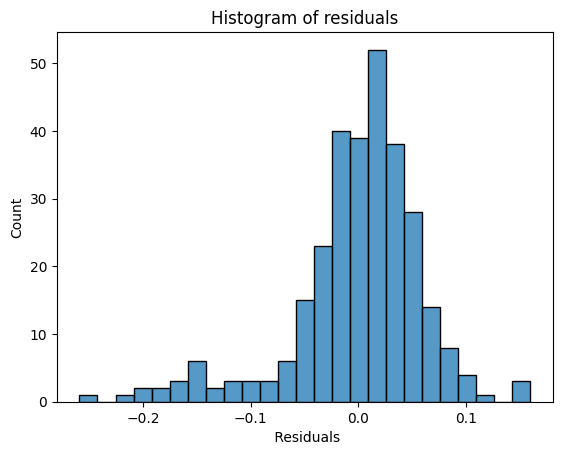

In [31]:
y_train_hat = lr_model.predict(X_sm)
errors = y_train - y_train_hat
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

Further doing shapiro test to determine it's normal distribution.

In [32]:
res = stats.shapiro(errors)
res.statistic

0.9148091077804565

The value of 0.91 shows that the residuals are normal.

In [33]:
np.mean(errors)

8.691139839237337e-17

Mean of residuals is also nearly zero, which also shows normal distribution.

<Axes: ylabel='Chance of Admit '>

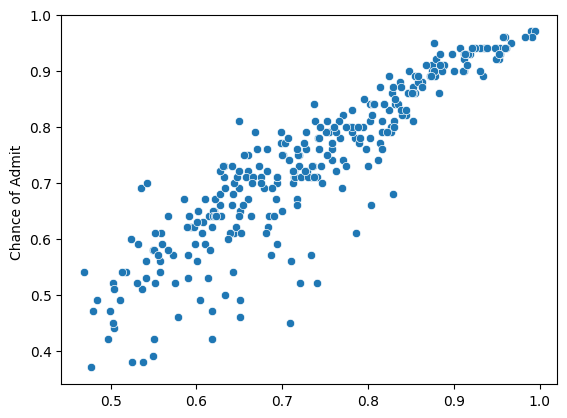

In [34]:
sns.scatterplot(x = y_train_hat, y = y_train)

It can be seen from the above plot that the relation is almost linear in nature.

<Axes: ylabel='Chance of Admit '>

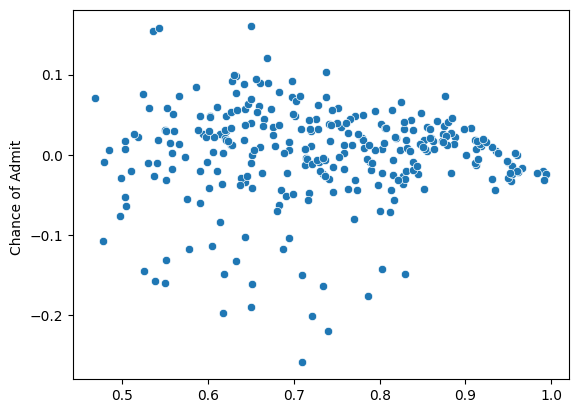

In [35]:
sns.scatterplot(x = y_train_hat, y = errors)

As it can be seen that there is no pattern in residual plot, so there is no Heteroscedasticity.

We can further have a goldfeld quandt test to check the same.

In [36]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_sm)
lzip(name, test)

[('F statistic', 1.34032222810941), ('p-value', 0.04178869895254593)]

Thus from the p-value it can se said that there is no heteroscedasticity.

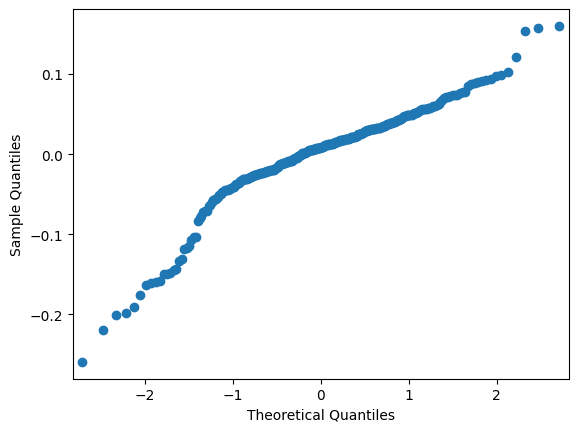

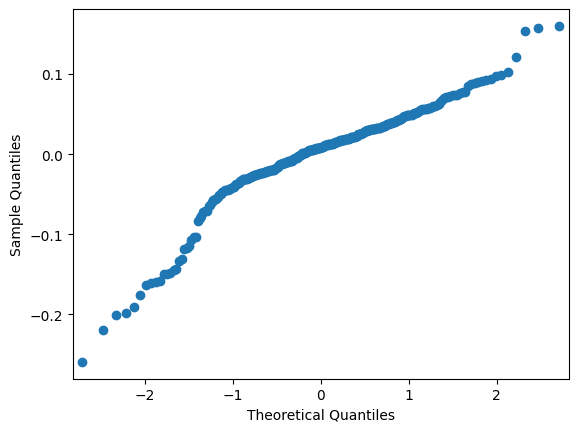

In [37]:
sm.qqplot(errors)

It can also be verified from the line that the points are almost on the line so the residuals are normally distributed.

**Verifying that residuals of Lasso and Ridge are also normally distributed**

Text(0.5, 1.0, 'Histogram of residuals')

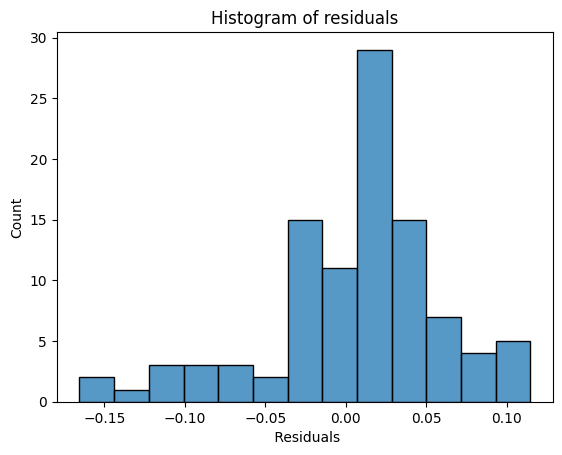

In [38]:
y_val_hat = ridge_model.predict(X_val_scaled)
errors = y_val - y_val_hat
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [39]:
res = stats.shapiro(errors)
res.statistic

0.9427743554115295

In [40]:
np.mean(errors)

0.00689327532379136

It can be said from the above shapiro test and the histogram that the ridge model also has normally distributed residuals.

Text(0.5, 1.0, 'Histogram of residuals')

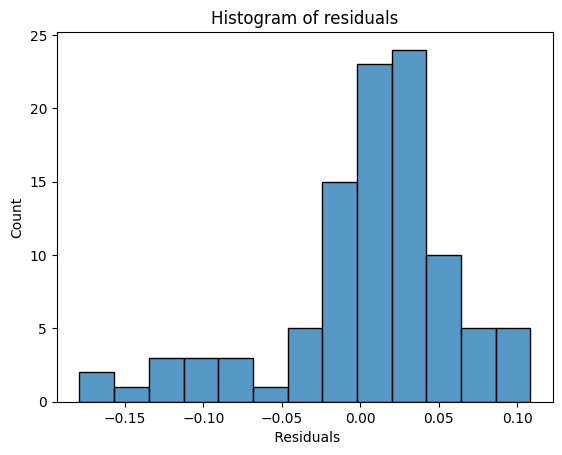

In [41]:
y_val_hat = lasso_model.predict(X_val_scaled)
errors = y_val - y_val_hat
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [42]:
res = stats.shapiro(errors)
res.statistic

0.9193863868713379

In [43]:
np.mean(errors)

0.00423599478493065

Same for Lasso model, the residuals are normally distributed.

Now we will perform various metrics on the model on the test set, we will use Ridge model only as it had the best score among all three.

In [44]:
y_test_hat = ridge_model.predict(X_test_scaled)

score = ridge_model.score(X_test_scaled, y_test)
print("Score:", score)

r2score = r2_score(y_test, y_test_hat)
print("R-squared:", r2score)

adj_score = 1 - (1 - r2score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("Adjusted R-squared:", adj_score)

mae = mean_absolute_error(y_test_hat, y_test)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test_hat, y_test)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Score: 0.8063506245721844
R-squared: 0.8063506245721844
Adjusted R-squared: 0.7916164329635463
Mean Absolute Error (MAE): 0.04491054329544445
Mean Squared Error (MSE): 0.0031892870871771104
Root Mean Squared Error (RMSE): 0.05647377344553054


The different statistics for the final prediction on the test set are above, the score has gone down for Test set from 84% for Validation set to 80% for Test set.

In [45]:
y_train_score = ridge_model.score(X_train_scaled, y_train)
y_val_score = ridge_model.score(X_val_scaled, y_val)
y_test_score = ridge_model.score(X_test_scaled, y_test)

print(f'Train Score: {y_train_score}')
print(f'Validation Score: {y_val_score}')
print(f'Test Score: {y_test_score}')

Train Score: 0.8144383259244041
Validation Score: 0.8472289497341955
Test Score: 0.8063506245721844


Final test score is 80%.

Model can definitely be improved, there can be loops for hyperparameters such as learning rate or regularisation lambda, and using these the models can be trained better.

**Actionable insights and recommendations**

1. The predictor variables such GRE score, TOEFL score and CGPA are correlated with each other, this may have affected the accuracy of the model, if the variables were independent of each other then it would have been better.
2. The quantity of independent variables are also less, more variables could have made a better model for this case study.
3. Data is small here only 500 rows, more data would make the model better, as in this data there are chances of overfitting if we make a more complex model fit it.
4. In real-world the data would be more and there would be more variables also, the model would perform better there but it depends on the data overall, in the real world the model could also become complex because of more data being present, here we are only using linear regression but we can use polynomial regression to fit the data better, that would make the model more complex, in that case regularisation would be more beneficial.
5. Here, the model is already simple enough that regularisation doesn't help much, but in real-world if we have polynomial regression along with regularisation it could help much more.
6. If the model is improved and it's accuracy improves this could be potentially benefit for the business as greater accuracy would mean that customers would trust the model and therefore institution more and quality would only lead to more customers and increased revenue.